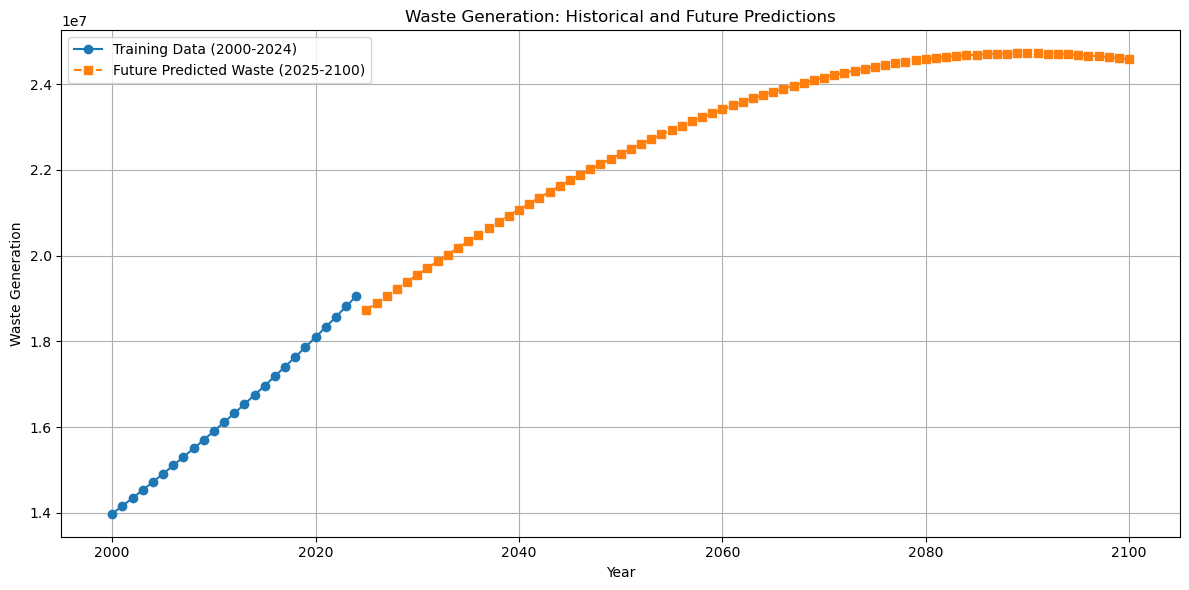

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Split data into training (2000-2024)
train_data = data[data['year'].between(2000, 2024)]

# Prepare training set
X_train = train_data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y_train = train_data['waste'].values.reshape(-1, 1)

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Train SVR model with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.001, 0.01, 0.1],
    'epsilon': [0.1, 0.2, 0.5]
}
svr = SVR(kernel='rbf')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled.ravel())
best_svr = grid_search.best_estimator_

# Predict future feature values using Linear Regression
future_years = pd.DataFrame({'year': list(range(2025, 2101))})
for feature in ['population', 'gdp', 'householdMinIncome', 'death']:
    model = LinearRegression()
    model.fit(train_data[['year']], train_data[feature])
    future_years[feature] = model.predict(future_years[['year']])

# Scale future feature values
future_features_scaled = scaler_X.transform(future_years[['year', 'population', 'gdp', 'householdMinIncome', 'death']])

# Predict waste for future years using SVR
y_future_pred_scaled = best_svr.predict(future_features_scaled)
y_future_pred = scaler_y.inverse_transform(y_future_pred_scaled.reshape(-1, 1)).ravel()

# Add predictions to future_years DataFrame
future_years['predicted_waste'] = y_future_pred

# Save future predictions to CSV
future_years.to_csv('Future_Waste_Predictions_2025_to_2100.csv', index=False)

# Plot historical vs future predictions
plt.figure(figsize=(12, 6))
plt.plot(train_data['year'], train_data['waste'], label='Training Data (2000-2024)', marker='o')
plt.plot(future_years['year'], future_years['predicted_waste'], label='Future Predicted Waste (2025-2100)', linestyle='--', marker='s')
plt.title('Waste Generation: Historical and Future Predictions')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


Mean Absolute Error (MAE): 261055.88031968684
Mean Squared Error (MSE): 94298276969.52171
R^2 Score: 0.9594843004000281


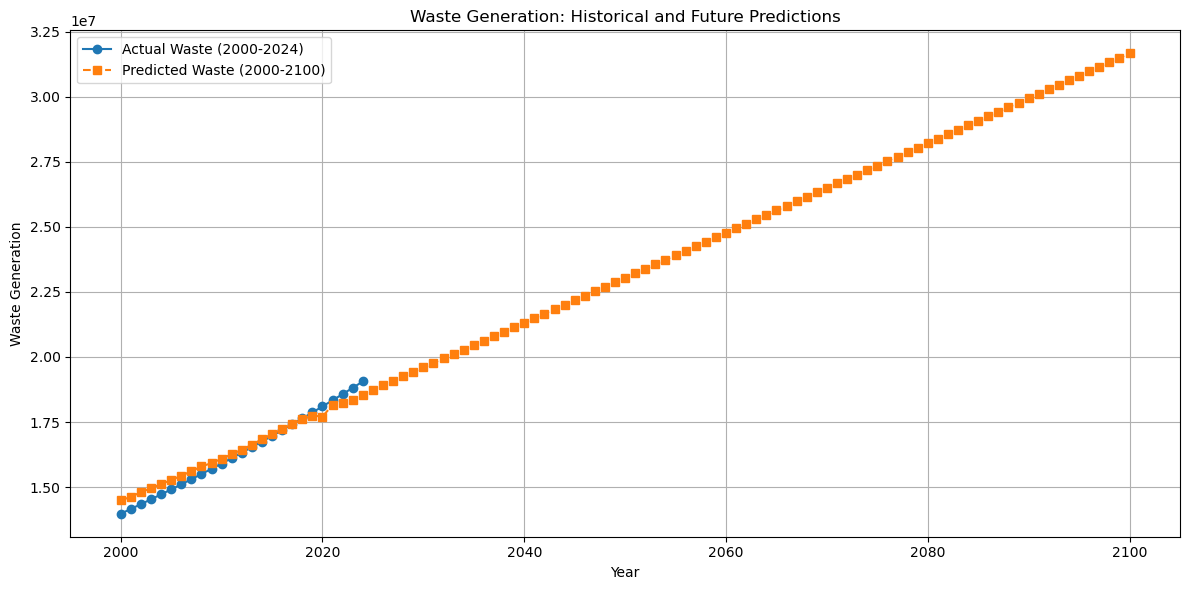

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load data
data = pd.read_csv('Data/cloneData.csv')

# Split data into training (2000-2024)
train_data = data[data['year'].between(2000, 2024)]

# Prepare training set
X_train = train_data[['year', 'population', 'gdp', 'householdMinIncome', 'death']]
y_train = train_data['waste'].values.reshape(-1, 1)

# Initialize scalers
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Scale training data
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train)

# Train SVR model with hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.001, 0.01, ],
    'epsilon': [0.1, 0.2]
}
svr = SVR(kernel='linear')
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train_scaled.ravel())
best_svr = grid_search.best_estimator_

# Predict future feature values using Linear Regression
future_years = pd.DataFrame({'year': list(range(2025, 2101))})
for feature in ['population', 'gdp', 'householdMinIncome', 'death']:
    model = LinearRegression()
    model.fit(train_data[['year']], train_data[feature])
    future_years[feature] = model.predict(future_years[['year']])

# Combine historical and future data for predictions
all_years = pd.concat([train_data[['year', 'population', 'gdp', 'householdMinIncome', 'death', 'waste']], future_years], ignore_index=True)
all_features_scaled = scaler_X.transform(all_years[['year', 'population', 'gdp', 'householdMinIncome', 'death']])

# Predict waste for all years using SVR
y_all_pred_scaled = best_svr.predict(all_features_scaled)
y_all_pred = scaler_y.inverse_transform(y_all_pred_scaled.reshape(-1, 1)).ravel()

# Add predictions to the combined DataFrame
all_years['predicted_waste'] = y_all_pred

# Calculate performance metrics on the training data
train_pred = all_years[all_years['year'] <= 2024]['predicted_waste']
train_actual = all_years[all_years['year'] <= 2024]['waste']
mae = mean_absolute_error(train_actual, train_pred)
mse = mean_squared_error(train_actual, train_pred)
r2 = r2_score(train_actual, train_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R^2 Score: {r2}")

# Save all predictions to CSV
all_years.to_csv('All_Waste_Predictions_2000_to_2100.csv', index=False)

# Plot historical vs future predictions
plt.figure(figsize=(12, 6))
plt.plot(all_years['year'], all_years['waste'], label='Actual Waste (2000-2024)', marker='o')
plt.plot(all_years['year'], all_years['predicted_waste'], label='Predicted Waste (2000-2100)', linestyle='--', marker='s')
plt.title('Waste Generation: Historical and Future Predictions')
plt.xlabel('Year')
plt.ylabel('Waste Generation')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
